# Feature engineering?



Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data.

## What are the different types of Missing Data?
### 1. Missing Completely at Random, MCAR: 
#### A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [240]:
import pandas as pd

df=pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [241]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [242]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Missing Data Not At Random(MNAR): 
#### Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [5]:

import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [7]:

df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

## Missing At Random(MAR)
### This is confusing and would be better stated as missing conditionally at random. Here, missing data do have a relationship with other variables in the dataset. However, the actual values that are missing are random.

# All the techniques of handling ,issing values


## 1. Imputation

### --> Imputation is used to fill in the missing values. The simplest way to perform imputation would be to fill in a default value. The column may contain categorical data. You can assign the most common category. 
### --> K-nearest neighbors, tree-based models, and linear models are some of the most common techniques used for imputation.

### 1.1 Mean/ MEdian /Mode imputation
#### When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [8]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [18]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [19]:
median=df.Age.mean()
median

29.69911764705882

In [21]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median,Age_mean
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [22]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.002015226002884


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

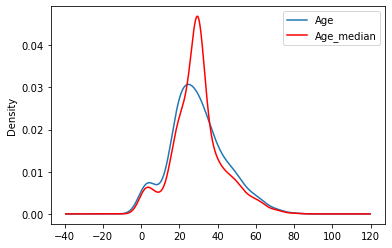

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation
#### Advantages
##### 1.Easy to implement(Robust to outliers)
##### 2.Faster way to obtain the complete dataset
#### Disadvantages
##### 1.Change or Distortion in the original variance
##### 2.Impacts Correlation

## 1.2 Random Sample Imputation
### Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

### When should it be used? It assumes that the data are missing completely at random(MCAR)

In [25]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [27]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [28]:
df['Age'].isnull().sum()

177

In [29]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [30]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [38]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [39]:
median=df.Age.median()
median

28.0

In [40]:
impute_nan(df,"Age",median)

df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


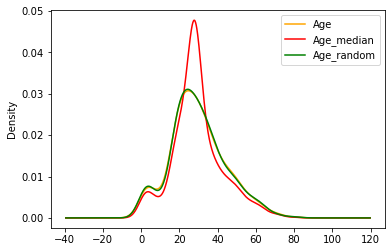

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='orange')
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [45]:
# Advantages
## 1.Easy To implement
## 2.There is less distortion in variance
# Disadvantage
## 1.Every situation randomness wont work

## 1.3 Capturing NAN values with a new feature
### It works well if the data are not missing completely at random

In [46]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [48]:
df.Age.median()

28.0

In [49]:
df['Age'].fillna(df.Age.median(),inplace=True)

df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [50]:
# Advantages
# 1.Easy to implement
# 2.Captures the importance of missing values
# Disadvantages
# 1.Creating Additional Features(Curse of Dimensionality)

## 1.4 End of Distribution imputation
### If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable. 

In [51]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

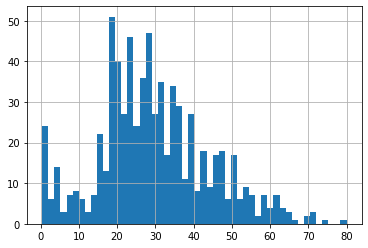

In [52]:
df.Age.hist(bins=50)

In [53]:
extreme=df.Age.mean()+3*df.Age.std()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

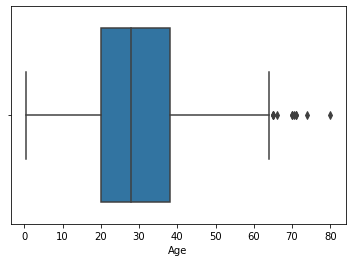

In [56]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [57]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [58]:
impute_nan(df,'Age',df.Age.median(),extreme)

df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

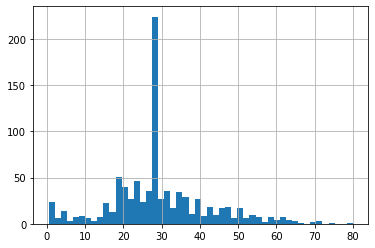

In [59]:
df['Age'].hist(bins=50)

<AxesSubplot:>

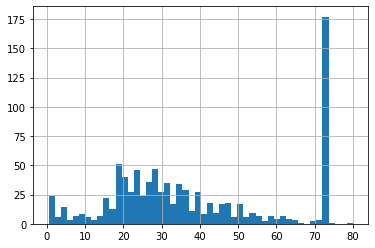

In [60]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

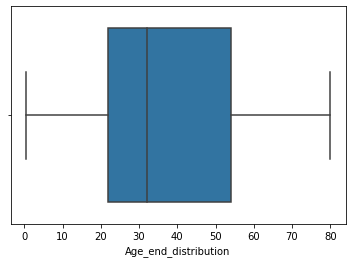

In [61]:

sns.boxplot('Age_end_distribution',data=df)

## 1.5 Arbitrary Value Imputation
### this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [62]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [63]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot:>

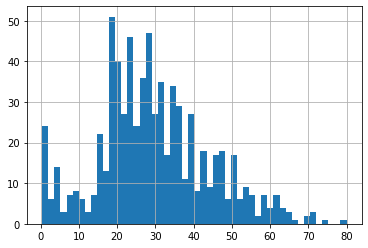

In [64]:
df['Age'].hist(bins=50)

In [65]:

# Advantages
#1.Easy to implement
#2.Captures the importance of missingess if there is one
#Disadvantages
# 1.Distorts the original distribution of the variable
# 2.If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
# 3.Hard to decide which value to use

# How To Handle Categroical Missing Values



## 1.6 Frequent Category Imputation

### Mode imputation consists of replacing all occurrences of missing values (NA) within a variable by the mode, which in other words refers to the most frequent value or most frequent category.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [66]:


data = pd.read_csv('train.csv')

In [67]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [70]:

df=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [71]:
df.shape



(1460, 4)

In [72]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [73]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

Compute the frequency with every feature

<AxesSubplot:>

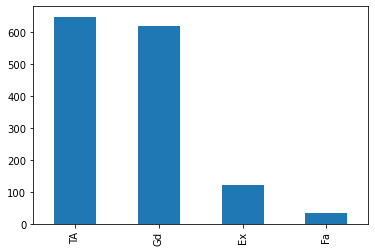

In [76]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

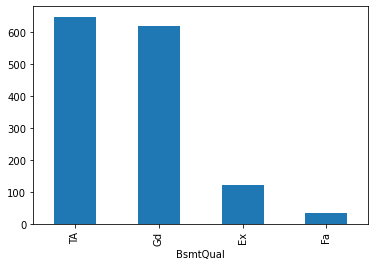

In [77]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

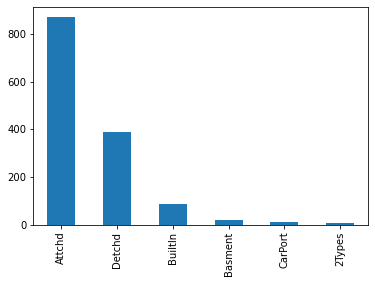

In [78]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

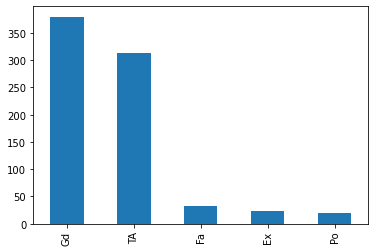

In [79]:

df['FireplaceQu'].value_counts().plot.bar()

In [80]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [81]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [82]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [83]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [84]:
#Advantages
#1.Easy To implement
# 2.Fater way to implement 
# Disadvantages
# 1.Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
# 2.It distorts the relation of the most frequent label

## 1.7 Adding a variable to capture NAN

In [85]:

df=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [86]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [87]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [89]:

df['BsmtQual'].mode()[0]

'TA'

In [93]:
df['BsmtQual'].fillna(df['FireplaceQu'],inplace=True)

df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [94]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [95]:

df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


Suppose if you have more frequent categories, we just replace NAN with a new category

In [102]:
df=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [103]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])


In [104]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [105]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [106]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [107]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


### Handle Categorical Features

One Hot Encoding

In [108]:
df=pd.read_csv('titanic.csv',usecols=['Sex'])

df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [109]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [110]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])

df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [111]:
df.dropna(inplace=True)

In [112]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Onehotencoding with many categories in a feature

In [114]:
df=pd.read_csv('mercedes1.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [115]:

df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [116]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [117]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [118]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [119]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [120]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [121]:
lst_10.append('X1')

df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


## Ordinal Number Encoding

In [155]:
import datetime


today_date=datetime.datetime.today()

today_date

datetime.datetime(2021, 7, 16, 18, 11, 8, 940157)

In [156]:
today_date-datetime.timedelta(3)

datetime.datetime(2021, 7, 13, 18, 11, 8, 940157)

In [157]:
#### List Comprehension
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [158]:
import pandas as pd
data=pd.DataFrame(days)
data.columns=["Day"]

In [159]:

data.head()

,Day
0,2021-07-16 18:11:08.940157
1,2021-07-15 18:11:08.940157
2,2021-07-14 18:11:08.940157
3,2021-07-13 18:11:08.940157
4,2021-07-12 18:11:08.940157


In [160]:
#data['weekday']=data['Day'].dt.weekday_name
data['Weekday'] = data['Day'].dt.day_name()
data.head()

,Day,Weekday
0,2021-07-16 18:11:08.940157,Friday
1,2021-07-15 18:11:08.940157,Thursday
2,2021-07-14 18:11:08.940157,Wednesday
3,2021-07-13 18:11:08.940157,Tuesday
4,2021-07-12 18:11:08.940157,Monday


In [161]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [162]:
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [163]:
data['weekday_ordinal']=data['Weekday'].map(dictionary).head()

In [164]:
data.head()

,Day,Weekday,weekday_ordinal
0,2021-07-16 18:11:08.940157,Friday,5.0
1,2021-07-15 18:11:08.940157,Thursday,4.0
2,2021-07-14 18:11:08.940157,Wednesday,3.0
3,2021-07-13 18:11:08.940157,Tuesday,2.0
4,2021-07-12 18:11:08.940157,Monday,1.0


## Count Or Frequency Encoding

In [165]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [167]:
columns=[1,3,5,6,7,8,9,13]

train_set=train_set[columns]

train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [168]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [169]:
country_map=train_set['Country'].value_counts().to_dict()

In [171]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

<ipython-input-171-15f7d40037bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Country']=train_set['Country'].map(country_map)


,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,NaN
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,NaN
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,NaN
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,NaN
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,NaN
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,NaN
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,NaN
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN


In [172]:
#Advantages
#Easy To Use
#Not increasing feature space 
##### Disadvantages
#It will provide same weight if the frequencies are same


## Target Guided Ordinal Encoding
#### Ordering the labels according to the target
#### Replace the labels by the joint probability of being 1 or 0

In [173]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [174]:
df['Cabin'].fillna('Missing',inplace=True)

df['Cabin']=df['Cabin'].astype(str).str[0]

df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [175]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [176]:

df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [177]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index


Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [178]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [179]:
enumerate(ordinal_labels,0)

In [180]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [181]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


### Mean Encoding

In [182]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

mean_ordinal


{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [183]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


# Normalization And Standardization

### Probability Ratio Encoding

#### 1.Probability of Survived based on Cabin--- Categorical Feature
#### 2.Probability of Not Survived---1-pr(Survived)
#### 3.pr(Survived)/pr(Not Survived)
#### 4.Dictonary to map cabin with probability
#### 5.replace with the categorical feature

In [184]:
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [185]:
### Replacing
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [186]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [188]:
# taking a first value of column
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [189]:
df.Cabin.unique()


array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [190]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [191]:
prob_df['Died']=1-prob_df['Survived']

prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [192]:
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [193]:
probability_encoded=prob_df['Probability_ratio'].to_dict()

In [195]:
df['Cabin_encoded']=df['Cabin'].map(probability_encoded)
df.head(20)

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
5,0,M,0.428274
6,0,E,3.000000
7,0,M,0.428274
8,1,M,0.428274
9,1,M,0.428274


## Transformation of Features
### Why Transformation of Features Are Required?

#### 1.Linear Regression---Gradient Descent ----Global Minima
#### 2.Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

#### Every Point has some vectors and Directiom

#### Deep Learning Techniques(Standardization, Scaling) 1.ANN--->GLobal Minima, Gradient 2.CNN 3.RNN

#### 0-255 pixels

### Types Of Transformation
#### 1.Normalization And Standardization
#### 2.Scaling to Minimum And Maximum values
#### 3.Scaling To Median And Quantiles
#### 4.Guassian Transformation Logarithmic Transformation Reciprocal Trnasformation Square Root Transformation Exponential Trnasformation Box Cox Transformation


### Standardization¶
##### We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [196]:
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [197]:
df['Age'].fillna(df.Age.median(),inplace=True)

df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [198]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [199]:
scaler=StandardScaler()
### fit vs fit_transform
df_scaled=scaler.fit_transform(df)

In [200]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

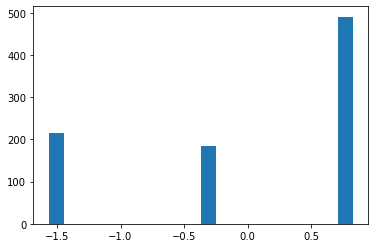

In [201]:

plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

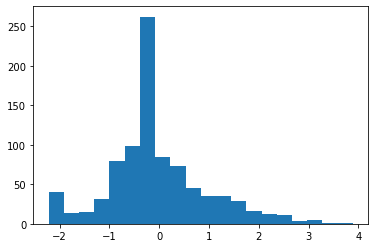

In [202]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

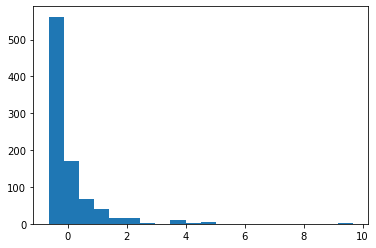

In [203]:
plt.hist(df_scaled[:,3],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

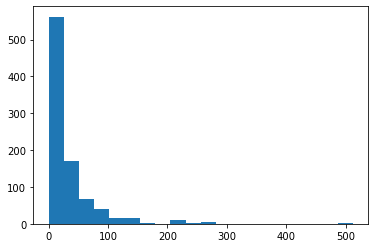

In [204]:
plt.hist(df['Fare'],bins=20)

## Min Max Scaling (### CNN)---Deep Learning Techniques
### Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [205]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

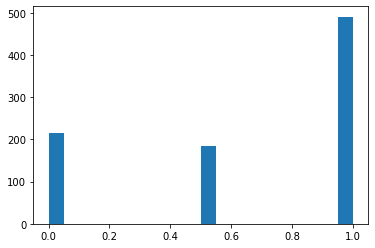

In [206]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

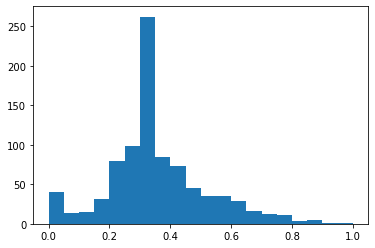

In [207]:
plt.hist(df_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

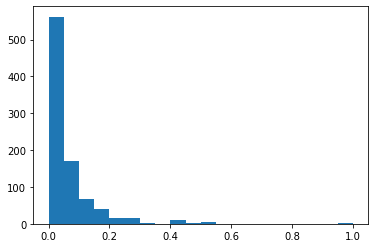

In [208]:
plt.hist(df_minmax['Fare'],bins=20)

## Robust Scaler
### It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

### IQR = 75th quantile - 25th quantile

###  X_scaled = (X - X.median) / IQR

#### 0,1,2,3,4,5,6,7,8,9,10

#### 9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [209]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

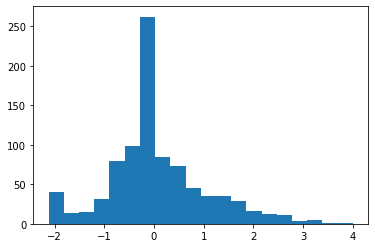

In [210]:
plt.hist(df_robust_scaler['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

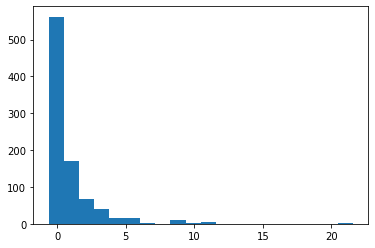

In [212]:

plt.hist(df_robust_scaler['Fare'],bins=20)

## Guassian Transformation
#### Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

#### 1.logarithmic transformation
#### 2.reciprocal transformation
#### 3.square root transformation
#### 4.exponential transformation (more general, you can use any exponent)
#### 5.boxcox transformation# 

In [213]:

df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [214]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

In [215]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [216]:
import scipy.stats as stat
import pylab

In [217]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

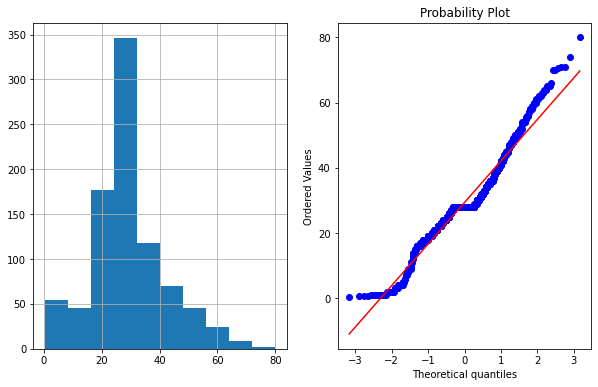

In [218]:

plot_data(df,'Age')

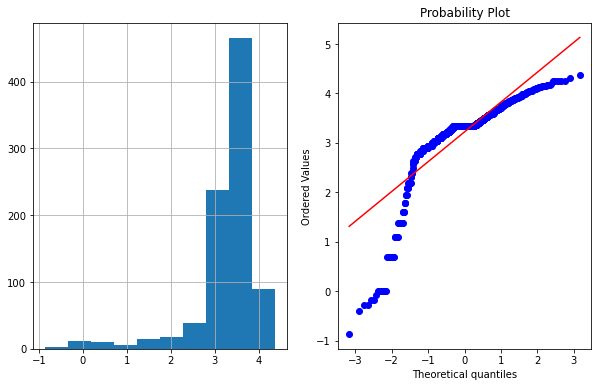

In [220]:
# Logarithmic Transformation

import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

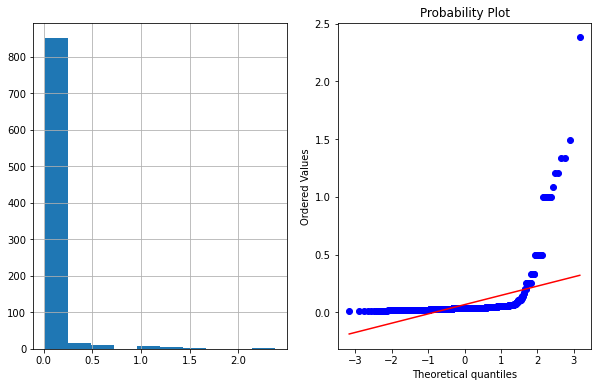

In [221]:
#Reciprocal Trnasformation

df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

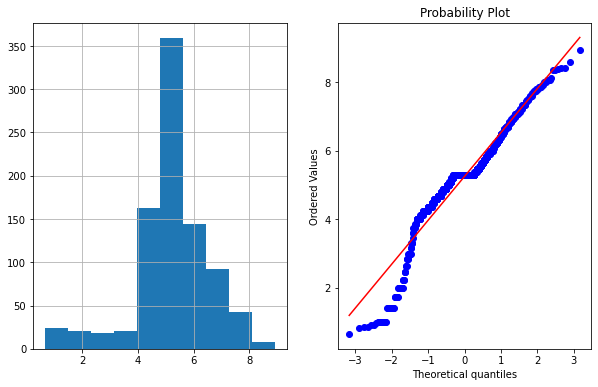

In [222]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

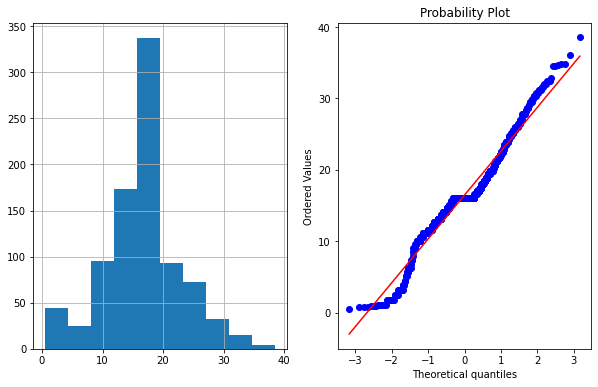

In [223]:
#### Exponential Transdormation
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

## BoxCOx Transformation
### The Box-Cox transformation is defined as:

#### T(Y)=(Y exp(λ)−1)/λ

#### where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [224]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [225]:
print(parameters)

0.7964531473656952


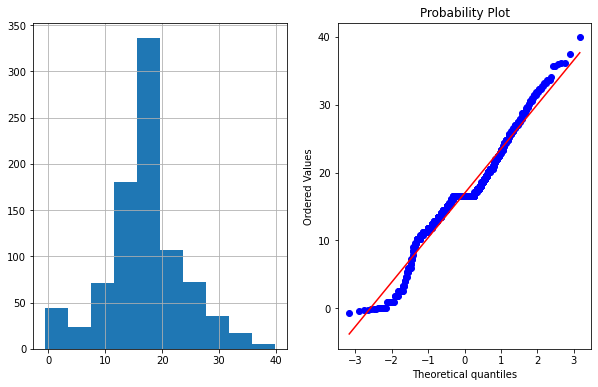

In [226]:
plot_data(df,'Age_Boxcox')

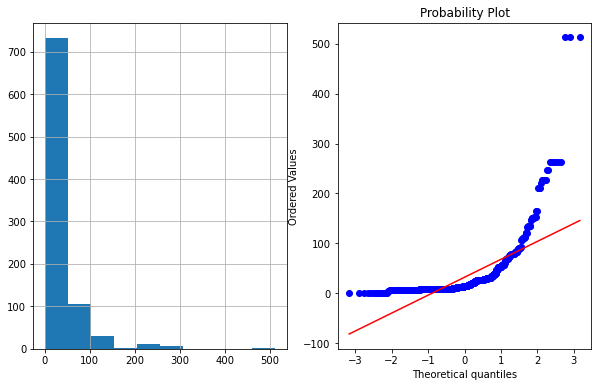

In [227]:
plot_data(df,'Fare')

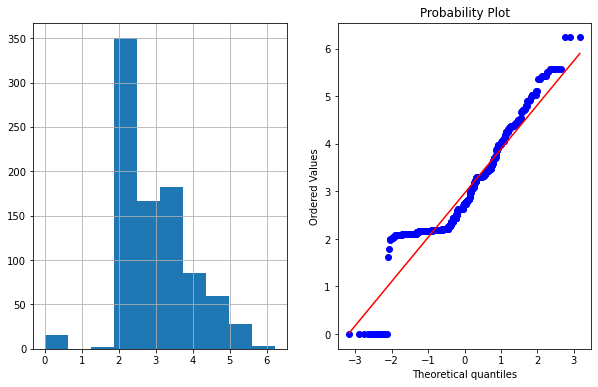

In [228]:

#### Fare
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

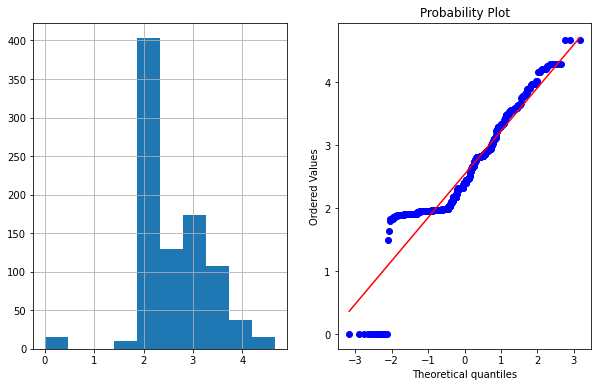

In [229]:

df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')

# Handling imbalanced data

### Why need to handle imbalanced data? Because of to reduce overfitting and underfitting problem.

### suppose a feature has a factor level2(0 and 1). it consists of 1’s is 5% and 0’s is 95%. It is called imbalanced data.

## 1.1 Under-sampling majority class
### Under-sampling the majority class will resample the majority class points in the data to make them equal to the minority class.

In [233]:
from imblearn.under_sampling import RandomUnderSampler
sam = RandomUnderSampler(random_state=0)
x_resampled_under ,y_resampled_under =sam.fit_resample(x_train,y_train)


## 1.2 Over Sampling Minority class by duplication

### Oversampling minority class will resample the minority class points in the data to make them equal to the majority class.

In [237]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy='minority')
x_over,y_over =over.fit_resample(x,y)

## 1.3 Over Sampling minority class using Synthetic Minority Oversampling Technique (SMOTE)

#### In this method, synthetic samples are generated for the minority class and equal to the majority class.

In [239]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(sampling_strategy='minority')
x,y = smt.fit_resample(x,y)

# Binning
### Binning is nothing but any data value within the range is made to fit into the bin. It is important in your data exploration activity. We typically use it to transform continuous variables into discrete ones.

### Suppose if we have AGE feature in continuous and we need to divide the age into groups as a feature then it will be useful.



# Handling Outliers on next document 